# Analyze simulation results 

In [1]:
# Plot simulation results 
### Loading in functions and modules required for analysis
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
from functions import *

ModuleNotFoundError: No module named 'xarray'

In [208]:
names=['arien.herrmann','art','cerceo-elizabeth','hilary.ong','joanneleovy','karen.glat','kshapq','lakshmibala.md',
       'lauren.grossman','madison.keenan','melissa.fuelling','mike-bethel','paul.w.charlton',
       'rtt','sari.soghoian1','sherrill.brown.md','stevesugden5']

### Getting the output files from each person

In [209]:
files = [glob.glob("/scratch/"+names[i]+"/case*/run/*.cam.h1.*.nc")[0] for i in np.arange(0,len(names),1)]

In [210]:
dat = xr.open_mfdataset(files, combine='nested', concat_dim='student')
dat = dat.assign_coords(student=names)
dat = dat.load()

### Picking out two people's runs to see the difference at different times during the simulation
### Here plotting near surface air temperature

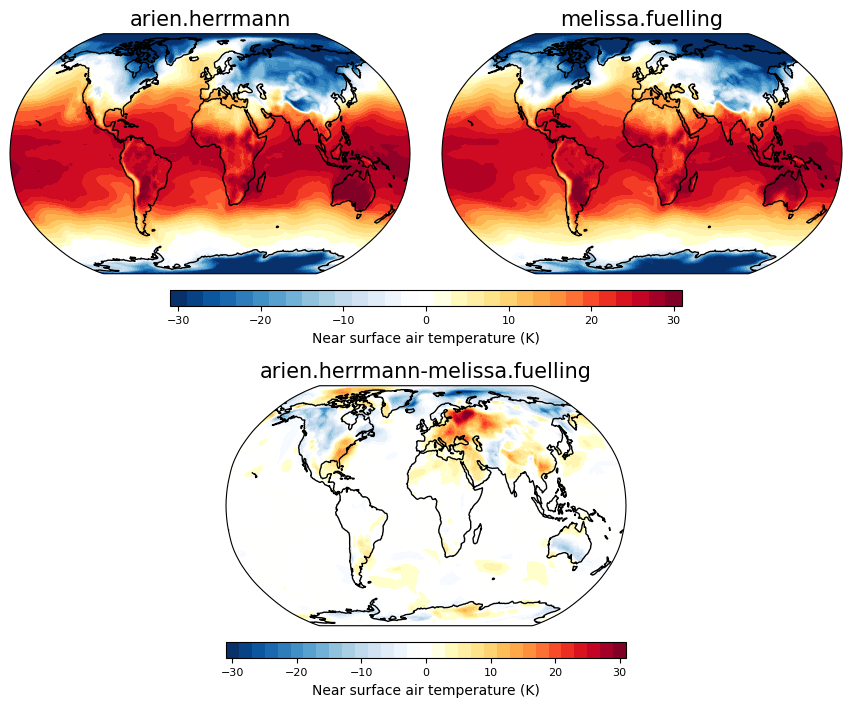

In [214]:
timeplot = 30
person1 = dat.sel(student='arien.herrmann')
person2 = dat.sel(student='melissa.fuelling')

fig = plt.figure(figsize=(16,16))

ci=2 ; cmax=30

ax = plotmap(fig, person1.TREFHT.isel(time=timeplot)-273.15, 2,-30,30,person1.student.values, 0.05,0.3,0.85,1)
ax = plotmap(fig, person2.TREFHT.isel(time=timeplot)-273.15, 2,-30,30,person2.student.values, 0.32,0.57,0.85,1)
ax = plotcolorbar(fig, ci, -1*cmax, cmax, 'Near surface air temperature (K)', 
                  0.15,0.47,0.83,0.84, fsize=8)

#----Use contour range -20,20,1 for other days or -0.5,0.5,0.05 to illustrate day 1 
ci=2 ; cmax=30
#ci=0.05 ; cmax=0.5
ax = plotmap(fig, person2.TREFHT.isel(time=timeplot) - person1.TREFHT.isel(time=timeplot), ci,-1*cmax,cmax,
             str(person1.student.values)+'-'+str(person2.student.values),0.185, 0.185+0.25, 0.63, 0.78)
ax = plotcolorbar(fig, ci, -1*cmax, cmax, 'Near surface air temperature (K)',
                  0.185,0.185+0.25,0.61,0.62, fsize=8)

### Here plotting precipitation

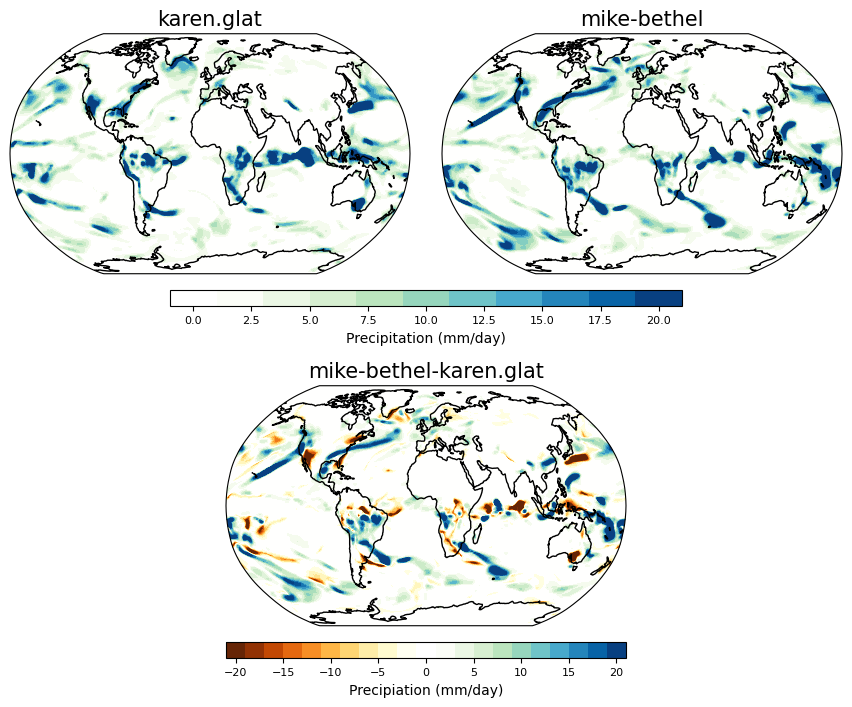

In [217]:
timeplot = 30 
person1 = dat.sel(student='karen.glat')
person2 = dat.sel(student='mike-bethel')

fig = plt.figure(figsize=(16,16))

ci=2 ; cmax=20

ax = plotmap(fig, person1.PRECT.isel(time=timeplot)*86400.*1000., ci,-1*cmax,cmax,person1.student.values, 0.05,0.3,0.85,1, cmap='precip')
ax = plotmap(fig, person2.PRECT.isel(time=timeplot)*86400.*1000., ci,-1*cmax,cmax,person2.student.values, 0.32,0.57,0.85,1, cmap='precip')
ax = plotcolorbar(fig, ci, -1*cmax, cmax, 'Precipitation (mm/day)',0.15,0.47,0.83,0.84, fsize=8, cmap='precip', posneg='pos')

ax = plotmap(fig, ((person2.PRECT.isel(time=timeplot) - person1.PRECT.isel(time=timeplot))*86400.*1000.), ci,-1*cmax,cmax,
             str(person2.student.values)+'-'+str(person1.student.values),0.185, 0.185+0.25, 0.63, 0.78, cmap='precip')
ax = plotcolorbar(fig, ci, -1*cmax, cmax, 'Precipiation (mm/day)',
                  0.185,0.185+0.25,0.61,0.62, fsize=8, cmap='precip')


### Summarizing everyone's simulations over Boulder

In [218]:
boulderlon=255 ; boulderlat=40
dat_boulder = dat.sel(lon=boulderlon, lat=boulderlat, method='nearest').load()

#### Near surface air temperature

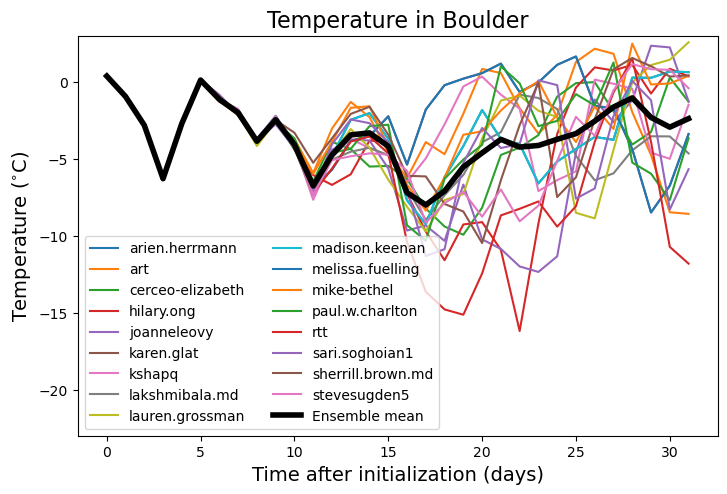

In [220]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_axes([0.05,0.7,0.4,0.25])
ax.set_ylim(-23,3)
ax.set_title('Temperature in Boulder',fontsize=16)
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=14)
ax.set_xlabel('Time after initialization (days)', fontsize=14)

for i in np.arange(0,dat.student.size,1):
    ax.plot(np.arange(0,dat.time.size,1), dat_boulder.TREFHT.isel(student=i)-273.15, label=dat.student.isel(student=i).values)

ax.plot(np.arange(0,dat.time.size,1), dat_boulder.TREFHT.mean('student')-273.15, linewidth=4,
        color='black',label='Ensemble mean')
    
ax.legend(loc='lower left', ncol=2)
    

#### Precipitation

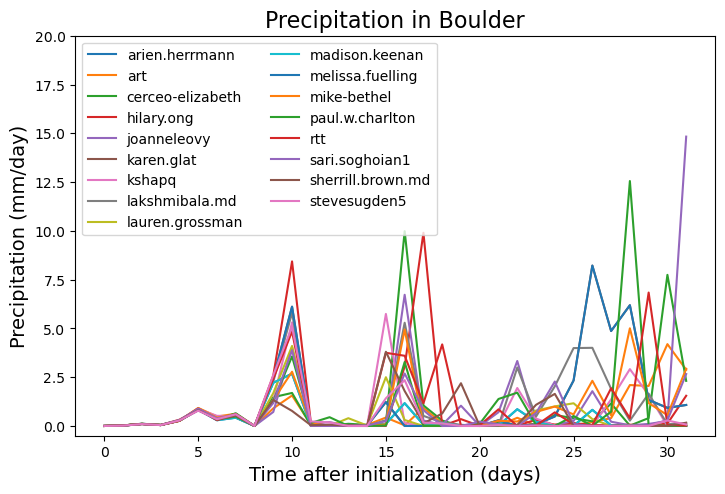

In [221]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_axes([0.05,0.7,0.4,0.25])
ax.set_ylim(-0.5,20)
ax.set_title('Precipitation in Boulder',fontsize=16)
ax.set_ylabel('Precipitation (mm/day)', fontsize=14)
ax.set_xlabel('Time after initialization (days)', fontsize=14)

for i in np.arange(0,dat.student.size,1):
    ax.plot(np.arange(0,dat.time.size,1), dat_boulder.PRECT.isel(student=i)*86400.*1000., label=dat.student.isel(student=i).values)

ax.legend(loc='upper left', ncol=2)
    

# Extra's - Sea level pressure

In [ ]:
timeplot = 30 
person1 = dat.sel(student='arien.herrmann')
person2 = dat.sel(student='melissa.fuelling')

fig = plt.figure(figsize=(16,16))

ci=4 ; cmax=40

ax = plotmap(fig, (person1.PSL.isel(time=timeplot)-1e5)/100., ci,-1*cmax,cmax,person1.student.values, 0.05,0.3,0.85,1)
ax = plotmap(fig, (person2.PSL.isel(time=timeplot)-1e5)/100., ci,-1*cmax,cmax,person2.student.values, 0.32,0.57,0.85,1)
ax = plotmap(fig, ((person2.PSL.isel(time=timeplot) - person1.PSL.isel(time=timeplot)))/100., ci,-1*cmax,cmax,
             str(person2.student.values)+'-'+str(person1.student.values),0.185, 0.185+0.25, 0.68, 0.83)

In [ ]:
print( (person1.PSL.isel(time=timeplot)).values)

In [ ]:
fig = plt.figure(figsize=(16,16))

ci=0.0001 ; cmax=0.001

ax = plotmap(fig, (person2.PRECT.isel(time=timeplot) - person1.PRECT.isel(time=timeplot)), ci,-1*cmax,cmax,
             str(person1.student.values)+'-'+str(person2.student.values),0.185, 0.185+0.25, 0.68, 0.83, cmap='precip')

In [ ]:
print((person2.PRECT.isel(time=timeplot) - person1.PRECT.isel(time=timeplot)).values)

In [ ]:
dat = [ xr.open_dataset(files[i][0]) for i in np.arange(0,len(files),1) ]

In [ ]:
print(len(files))

In [ ]:
print(np.shape(files))

In [ ]:
print(files[2][0])

In [ ]:
glob.glob("/scratch/"+names[0]+"/case*/*")

In [ ]:
print(files)